<a href="https://colab.research.google.com/github/Ed00107/sbd1/blob/main/%22%E2%84%968_Python_pandas_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Описательная статистика
Описательная статистика или дескриптивная статистика (англ. descriptive statistics) занимается обработкой эмпирических данных, их систематизацией, наглядным представлением в форме графиков и таблиц, а также их количественным описанием посредством основных статистических показателей.

Противопоставляется статистическому выводу в том смысле, что не делает выводов о генеральной совокупности на основании результатов исследования частных случаев. Статистический вывод же предполагает, что свойства и закономерности, выявленные при исследовании объектов выборки, также присущи генеральной совокупности.

Описательная статистика использует три основных метода агрегирования данных:

1. Табличное представление
2. Графическое изображение
3. Расчет статистических показателей

Давайте еще раз потренируемся работать с pandas и matplotlib, на этот раз поработаем над набором данных, отражающем цены на дома. 

Скачать его можно по [ссылке](https://drive.google.com/file/d/1ipSuK9hgNSUAfBaqHbz0XOJCuN4nw_TZ/view?usp=sharing)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MELBOURNE_HOUSE_PRICES_LESS.csv to MELBOURNE_HOUSE_PRICES_LESS (1).csv


In [ ]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv") # https://www.kaggle.com/anthonypino/melbourne-housing-market
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


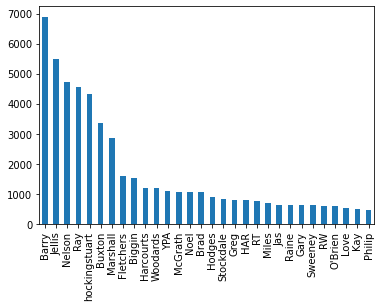

In [ ]:
# построить бар плот топ 30 продавцов
df['SellerG'].value_counts().head(30).plot(kind='bar')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [ ]:
# S   - проданная недвижимость
# SP  - недвижимость, проданная ранее
# PI  - недвижимость, переданная в пользование
# PN  - проданно ранее. не разглашается
# SN  - продано. не разглашается
# NB  - нет предложения
# VB  - ставка продавца
# W   - изъят до аукциона
# SA  - продан после аукциона
# SS  - продано после аукциона, цена не разглашается.
df['Method'].unique()

array(['S', 'SP', 'PI', 'SN', 'VB', 'PN', 'SA', 'W', 'SS'], dtype=object)

In [ ]:
df['Type'].unique()

array(['h', 't', 'u'], dtype=object)

In [ ]:
df.shape

(63023, 13)

In [ ]:
df['Rooms'].unique()

array([ 3,  2,  6,  4,  1,  5,  7,  8, 11, 10, 12,  9, 31, 16])

In [ ]:
df['Rooms'].value_counts()

3     27950
4     15747
2     13248
5      3434
1      2111
6       424
7        61
8        29
10        7
9         5
12        4
11        1
31        1
16        1
Name: Rooms, dtype: int64

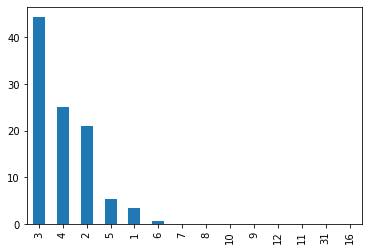

In [ ]:
df['Rooms'].value_counts(normalize = True).apply(lambda x: round(x * 100, 3)).plot(kind = 'bar')

In [ ]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


Обратите внимание как меняется потребление памяти после преобразования типов

In [ ]:
df.astype({
    'Rooms': np.int8,
    'Price': np.float32,
    'Date': np.datetime64,
    'Postcode': np.int16,
    'Propertycount': np.int16,
}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63023 non-null  object        
 1   Address        63023 non-null  object        
 2   Rooms          63023 non-null  int8          
 3   Type           63023 non-null  object        
 4   Price          48433 non-null  float32       
 5   Method         63023 non-null  object        
 6   SellerG        63023 non-null  object        
 7   Date           63023 non-null  datetime64[ns]
 8   Postcode       63023 non-null  int16         
 9   Regionname     63023 non-null  object        
 10  Propertycount  63023 non-null  int16         
 11  Distance       63023 non-null  float64       
 12  CouncilArea    63023 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(1), int16(2), int8(1), object(7)
memory usage: 4.9+ MB


In [ ]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv", dtype={
    'Rooms': np.int8,
    'Price': np.float32,
    'Postcode': np.int16,
    'Propertycount': np.int16,
}, parse_dates=['Date',])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63023 non-null  object        
 1   Address        63023 non-null  object        
 2   Rooms          63023 non-null  int8          
 3   Type           63023 non-null  object        
 4   Price          48433 non-null  float32       
 5   Method         63023 non-null  object        
 6   SellerG        63023 non-null  object        
 7   Date           63023 non-null  datetime64[ns]
 8   Postcode       63023 non-null  int16         
 9   Regionname     63023 non-null  object        
 10  Propertycount  63023 non-null  int16         
 11  Distance       63023 non-null  float64       
 12  CouncilArea    63023 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(1), int16(2), int8(1), object(7)
memory usage: 4.9+ MB


In [ ]:
df

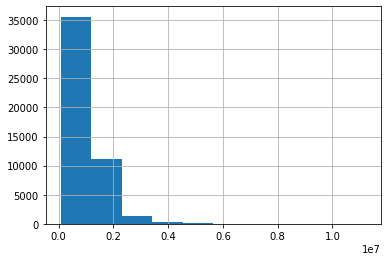

In [ ]:
df['Price'].hist()

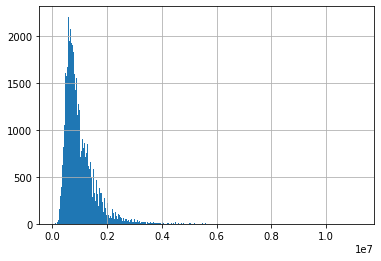

In [ ]:
df['Price'].hist(bins='auto')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


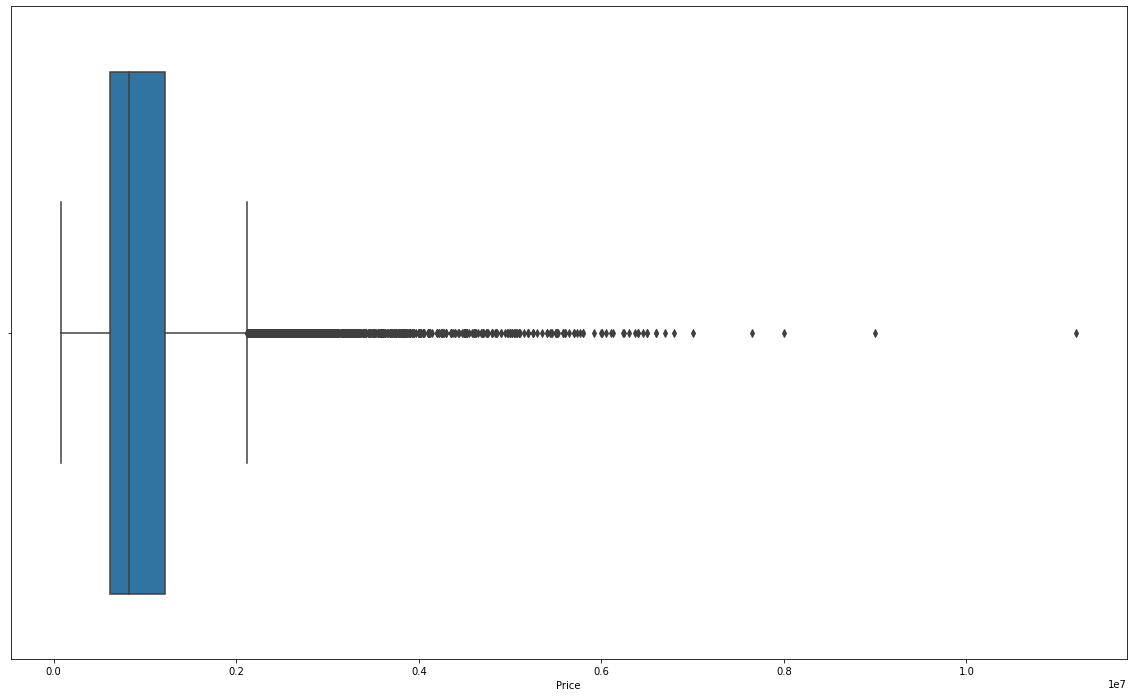

In [ ]:
import seaborn as sns
plt.figure(figsize = (20, 12))
sns.boxplot(df['Price'])

Напоминаю, что также есть еще и категориальный тип данных, и на самом деле, например, колонки Method и Postcode можно рассматривать как [категориальные](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

Это дает нам некоторые дополнительные возможности, а также еще больше оптимизирует потребление памяти, поскольку в самой таблице храниться будут лишь указатели на категории. Т.е вместо 'dog' 'cat' 'dog' грубо говоря мы будем под капотом хранить 1 2 1, что занимает меньше места.

Помимо этого, меняется, например, вывод метода .value_counts(), если мы применяем его к колонке с типом category, то будет выводится информация даже о тех категориях, которые в нашей таблице не представлены (но известно что они могут быть).

#### Задание
Приведите колонки Method и Postcode к типу category.

In [ ]:
df.astype({'Method': 'category', 'Postcode': 'category'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         63023 non-null  object  
 1   Address        63023 non-null  object  
 2   Rooms          63023 non-null  int64   
 3   Type           63023 non-null  object  
 4   Price          48433 non-null  float64 
 5   Method         63023 non-null  category
 6   SellerG        63023 non-null  object  
 7   Date           63023 non-null  object  
 8   Postcode       63023 non-null  category
 9   Regionname     63023 non-null  object  
 10  Propertycount  63023 non-null  int64   
 11  Distance       63023 non-null  float64 
 12  CouncilArea    63023 non-null  object  
dtypes: category(2), float64(2), int64(2), object(7)
memory usage: 5.5+ MB


In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [ ]:
df['Date'].nunique()

112

Посмотрим, есть ли какие-нибудь высокочастотные паттерны в опубликованных объявлениях?

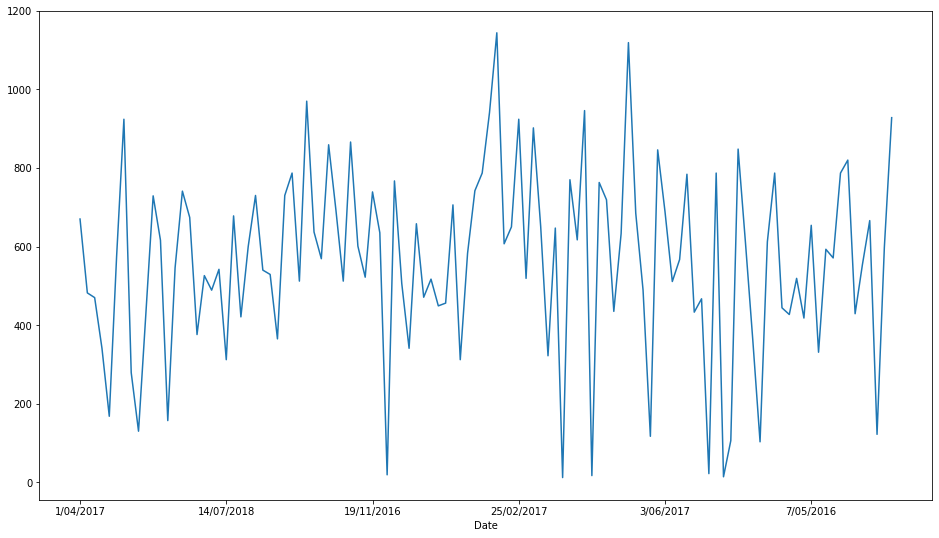

In [ ]:
df.groupby('Date').size().plot(kind = 'line', figsize=(16,9))



**Гипотеза:** продажи просаживаются в выходные дни

In [ ]:
dt_count = df.groupby('Date').size()
dt_count

Date
1/04/2017     670
1/07/2017     482
1/09/2018     470
10/02/2018    341
10/03/2018    168
             ... 
8/09/2018     554
8/10/2016     666
9/06/2018     122
9/09/2017     598
9/12/2017     928
Length: 112, dtype: int64

In [ ]:
dt_count.index

Index(['1/04/2017', '1/07/2017', '1/09/2018', '10/02/2018', '10/03/2018',
       '10/09/2016', '10/12/2016', '11/02/2017', '11/03/2017', '11/08/2018',
       ...
       '7/10/2017', '7/11/2016', '8/01/2018', '8/04/2017', '8/07/2017',
       '8/09/2018', '8/10/2016', '9/06/2018', '9/09/2017', '9/12/2017'],
      dtype='object', name='Date', length=112)

In [ ]:
pd.to_datetime(dt_count.index).

Int64Index([ 1,  1,  1, 10, 10, 10, 10, 11, 11, 11,
            ...
             7,  7,  8,  8,  8,  8,  8,  9,  9,  9],
           dtype='int64', name='Date', length=112)

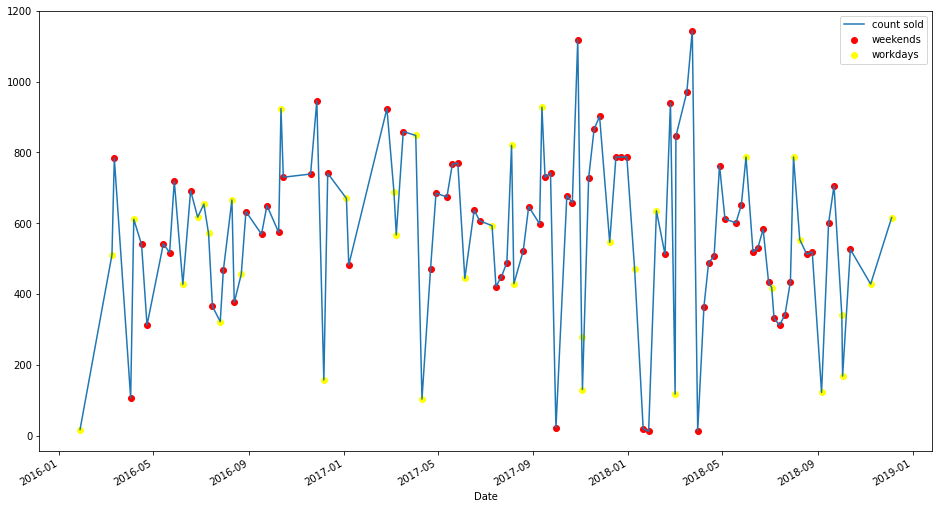

In [ ]:
dt_count = df.groupby('Date').size()
dt_count.index = pd.to_datetime(dt_count.index)
dt_count.sort_index(inplace = True)
dt_count.plot(figsize=(16,9))

wdays = pd.Series(dt_count.index.weekday.isin([5,6]), index=dt_count.index)
plt.scatter(dt_count[wdays].index, dt_count[wdays].values, c='red')
plt.scatter(dt_count[~wdays].index, dt_count[~wdays].values, c='yellow')
plt.legend(['count sold', 'weekends', 'workdays'])

Судя по данному графику гипотеза неверна, но видно, что в основном у нас записи о продажах в выходные дни, таких записейе гораздо больше, чем записей о продажах в выходные.

Посмотрим на различия в стоимости жилья в разрезе разных типов.

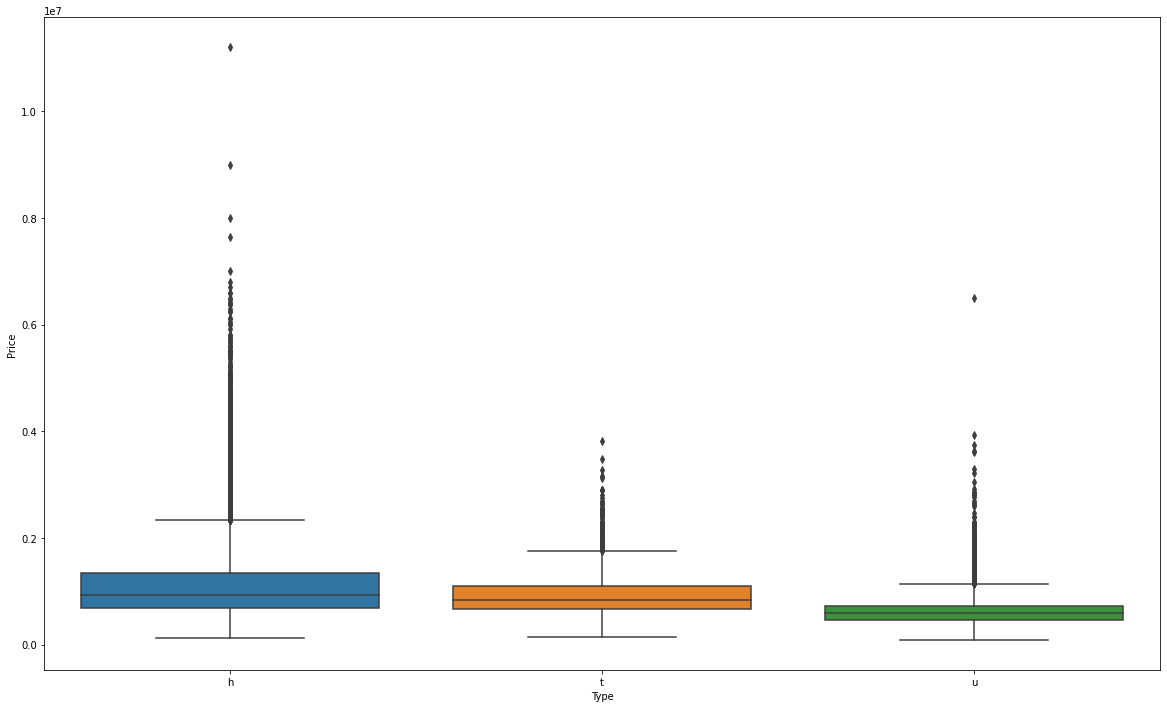

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Type', y='Price', data=df, orient='v')

Boxplot дает нам ясно понять, что в среднем h (дом) > t (таунхаус) > u (юнит, квартира)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


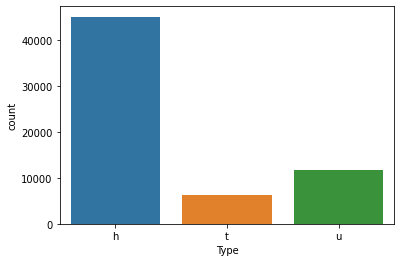

In [ ]:
sns.countplot('Type', data=df, orient='v')

Но стоит также отметить, что статистики по домам у нас гораздо больше, чем по таунхаусам и юнитам.

#### Задание
Постройте график динамики средней стоимости от времени в разрезе по типу жилья и кол-ву комнат (facet grid)

In [ ]:
grouped

,Date,Rooms,Type,Price
0,1/04/2017,1,h,1.100000e+06
1,1/04/2017,1,t,4.575000e+05
2,1/04/2017,1,u,4.238409e+05
3,1/04/2017,2,h,1.027385e+06
4,1/04/2017,2,t,6.234333e+05
...,...,...,...,...
1429,9/12/2017,4,h,1.222874e+06
1430,9/12/2017,4,t,1.255100e+06
1431,9/12/2017,4,u,1.610000e+06
1432,9/12/2017,5,h,1.905677e+06


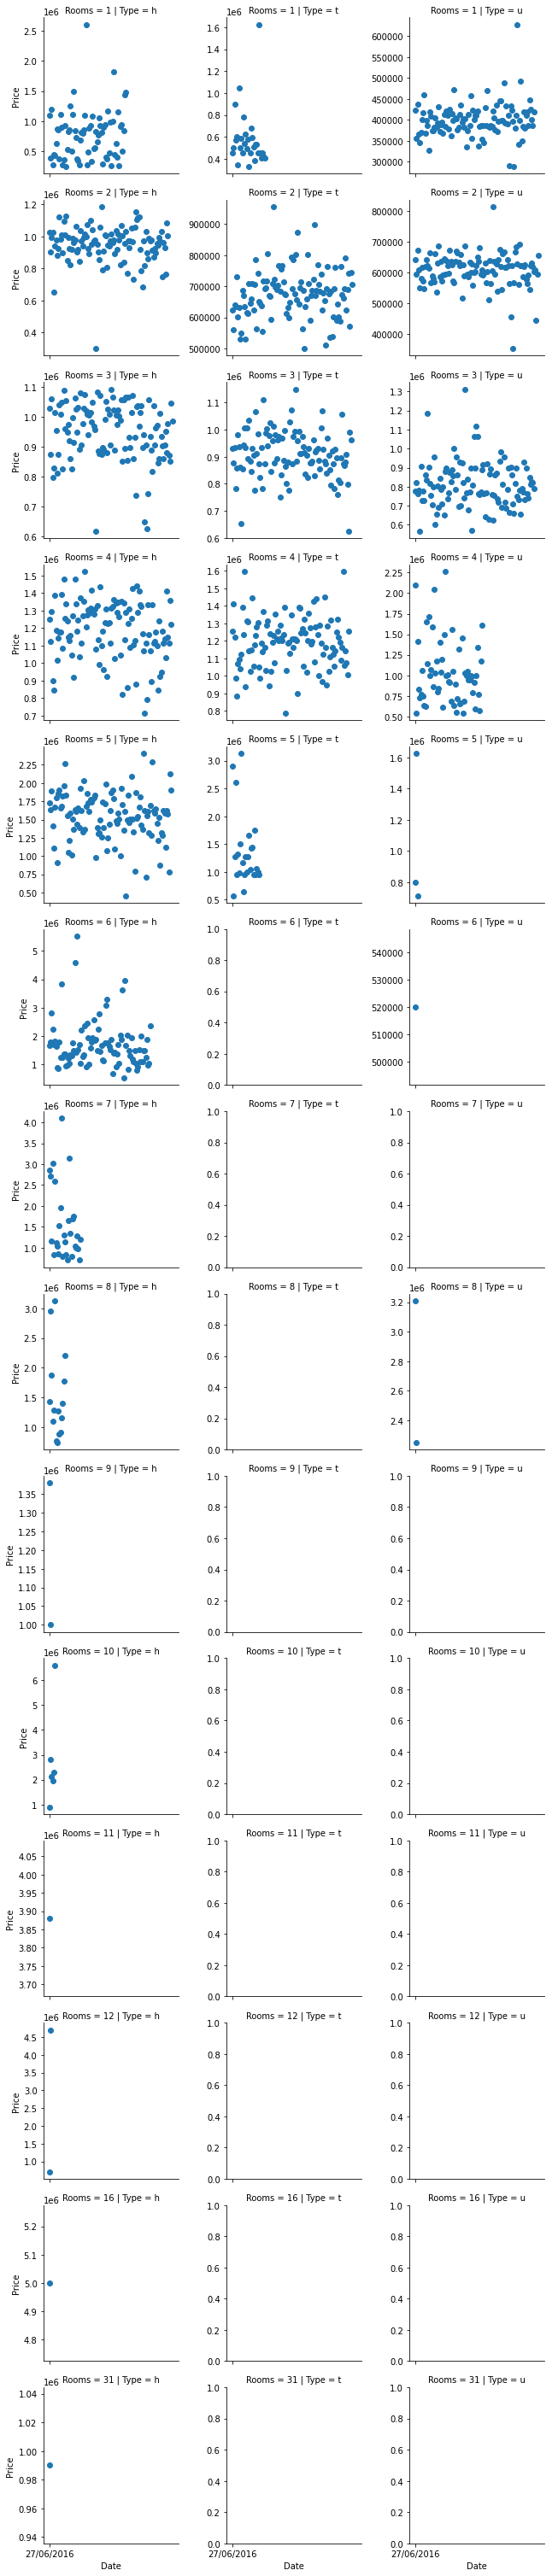

In [ ]:
grouped = df[np.isfinite(df['Price'])].groupby(['Date', 'Rooms', 'Type'])['Price'].mean().reset_index()

g = sns.FacetGrid(grouped, col="Type", row="Rooms", sharex=True, sharey=False)
g = g.map(plt.scatter, "Date", "Price").add_legend()

#### Задание
Сделайте ту же самую группировку, но теперь по году и месяцу, и отобразите ее.

https://stackoverflow.com/questions/45304531/extracting-the-first-day-of-month-of-a-datetime-type-column-in-pandas

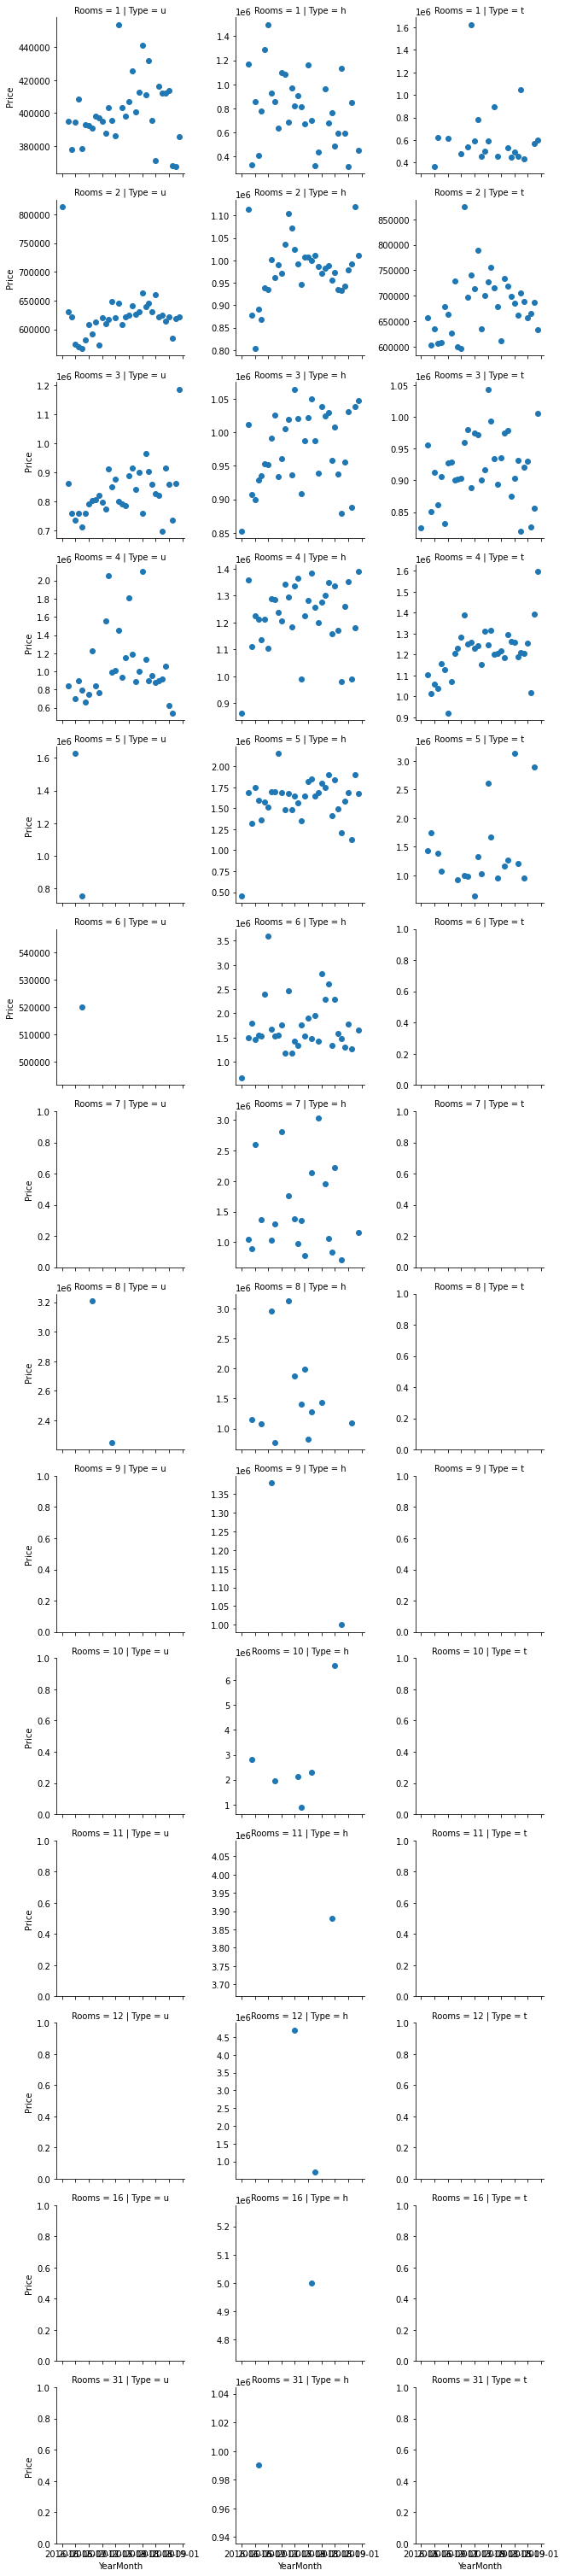

In [ ]:
df['YearMonth'] = df['Date'].astype('datetime64[M]')
# df['YearMonth'] = pd.to_datetime(df['Date'])

grouped = df[np.isfinite(df['Price'])].groupby(['YearMonth', 'Rooms', 'Type'])['Price'].mean().reset_index()

g = sns.FacetGrid(grouped, col="Type", row="Rooms", sharex=True, sharey=False)
g = g.map(plt.scatter, "YearMonth", "Price").add_legend()

## Заполнение пропусков
[Данные](https://drive.google.com/file/d/1CAo3kk_0nCgpTJ_UGfUR4eMBXrz-_LNp/view?usp=sharing)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("property data.csv")
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Мы имеем дело с небольшой таблицей, но здесь представлены многие ситуации с которыми приходится сталкиваться при работе с данными.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


Чтобы было немного удобнее работать, переименуем столбцы

In [ ]:
df = df.rename({
    'PID': 'pid',
    'ST_NUM': 'Street number',
    'ST_NAME': 'Street name',
    'OWN_OCCUPIED': 'Occupied',
    'NUM_BEDROOMS': 'Number of bedrooms',
    'NUM_BATH': 'Number of bathrooms',
    'SQ_FT': 'Area, sqft'
}, axis=1)
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,"Area, sqft"
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
!cat "property data.csv"
# ls - список содержимого в директории
# cd - смена директории
# pwd - текущая директория

PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104,PUTNAM,Y,3,1,1000
100002000,197,LEXINGTON,N,3,1.5,--
100003000,,LEXINGTON,N,n/a,1,850
100004000,201,BERKELEY,12,1,NaN,700
,203,BERKELEY,Y,3,2,1600
100006000,207,BERKELEY,Y,NA,1,800
100007000,NA,WASHINGTON,,2,HURLEY,950
100008000,213,TREMONT,Y,1,1,
100009000,215,TREMONT,Y,na,2,1800


Посмотрим на уникальные значения в колонке "кол-во спален".

1. Присутствует пропуск 'na' как строка
2. Присутствует пропуск np.nan
3. Сама колонка скорее целочисленная

In [ ]:
df['Number of bedrooms'].unique()

array(['3', nan, '1', '2', 'na'], dtype=object)

Мы можем точечно поменять все неустраивающие нас значения на то что нам нужно, например, 'na' на np.nan. Но на самом деле мы могли бы решить много проблем уже на этапе чтения. Нужно воспользоваться параметром na_values в методе pd.read_csv()

In [ ]:
df = pd.read_csv("property data.csv", na_values=['na',])
df = df.rename({'PID': 'pid',
           'ST_NUM': 'Street number',
           'ST_NAME': 'Street name',
           'OWN_OCCUPIED': 'Occupied',
           'NUM_BEDROOMS': 'Number of bedrooms',
           'NUM_BATH': 'Number of bathrooms',
           'SQ_FT': 'Area'}, axis=1)
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700
4,NaN,203.0,BERKELEY,Y,3.0,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800


In [ ]:
df['Number of bedrooms'].unique()

array([ 3., nan,  1.,  2.])

Но все же некоторые значения не имеют смысл пропусков, однако работать с ними не так удобно, давайте обработаем такие колонки:

In [ ]:
df = df.replace({'Occupied': {'Y': True, 'N': False}})
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700
4,NaN,203.0,BERKELEY,True,3.0,2,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950
7,100008000.0,213.0,TREMONT,True,1.0,1,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2,1800


Мы можем точечно менять значения в таблице с помощью .loc[ ]

In [ ]:
df.loc[df['Occupied'] == '12', 'Occupied'] = np.nan
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700
4,NaN,203.0,BERKELEY,True,3.0,2,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950
7,100008000.0,213.0,TREMONT,True,1.0,1,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2,1800


In [ ]:
df = df.replace({'Occupied': {'Y': True, 'N': False}})
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700
4,NaN,203.0,BERKELEY,True,3.0,2,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950
7,100008000.0,213.0,TREMONT,True,1.0,1,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2,1800


In [ ]:
df.loc[df['Number of bathrooms'] == 'HURLEY', 'Number of bathrooms'] = np.nan
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700
4,NaN,203.0,BERKELEY,True,3.0,2,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950
7,100008000.0,213.0,TREMONT,True,1.0,1,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2,1800


Иногда сразу видно какие значения пропущены, посмотрите на последовательность значений в колонке pid.

In [ ]:
df.iloc[4, 0] = 100005000.0
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,--
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700
4,100005000.0,203.0,BERKELEY,True,3.0,2,1600
5,100006000.0,207.0,BERKELEY,True,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950
7,100008000.0,213.0,TREMONT,True,1.0,1,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2,1800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pid                  9 non-null      float64
 1   Street number        7 non-null      float64
 2   Street name          9 non-null      object 
 3   Occupied             7 non-null      object 
 4   Number of bedrooms   6 non-null      float64
 5   Number of bathrooms  7 non-null      object 
 6   Area                 8 non-null      object 
dtypes: float64(3), object(4)
memory usage: 632.0+ bytes


Для пропусков площади (Area) сделаем следующее заполненение: заполним площадь средней площадью в разрезе улицы.

In [ ]:
mean_values = df.groupby('Street name')['Area'].mean() # не может посчитать среднее, так как колонка распознается как строковая
mean_values

TypeError: ignored

In [ ]:
df = df.replace({'Area': {'--': np.nan}}).astype({'Area': np.float32})
df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,True,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,True,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,True,1.0,1,NaN
8,100009000.0,215.0,TREMONT,True,NaN,2,1800.0


In [ ]:
mean_values = df.groupby('Street name')['Area'].mean() # теперь все хорошо
mean_values

Street name
BERKELEY      1033.333374
LEXINGTON      850.000000
PUTNAM        1000.000000
TREMONT       1800.000000
WASHINGTON     950.000000
Name: Area, dtype: float32

In [ ]:
for st in ['LEXINGTON', 'TREMONT']:
  df.loc[df['Street name'] == st, 'Area'] = mean_values[st]

df

,pid,Street number,Street name,Occupied,Number of bedrooms,Number of bathrooms,Area
0,100001000.0,104.0,PUTNAM,True,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,False,3.0,1.5,850.0
2,100003000.0,NaN,LEXINGTON,False,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,True,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,True,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,True,1.0,1,1800.0
8,100009000.0,215.0,TREMONT,True,NaN,2,1800.0
